# CSCN8010 Lab5 Practice

# Report Goal
### The goal of this report is to build a model that can best predict the risk of diabetes progression, ***given the body mass index  (BMI) feature in the dataset***. This will be used as a screening tool to help physicians with identifying patients at risk.

In [28]:
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Getting the data
In this report, we will use a data from Scikit-learn that shows **ten baseline variables**, age, sex, body mass index, average blood pressure, and **six blood serum measurements** were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.



The source of this data is [Link to the data source](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [4]:
from sklearn import datasets

# Exploratory Data Analysis
## Exploring and Describing the data
### In this section, we are going to be looking at some info of our data.

In [5]:
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Check the keys of the dataset
print(diabetes.keys())

# Check the feature names
print(diabetes.feature_names)

# Check the description of the dataset
print(diabetes.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density li

In [7]:
import pandas as pd

# Convert the data to a pandas DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Display statistical summary
print(df.describe())

                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

# Set a test-set aside
### Split the data into X and Y (features and target variable)

In [9]:
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Split the data into features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation. 
Consider using the cross_validate function as it provides a list of scoring functions as an input.
***At least two polynomial models (degrees >=0, of your choice)***

In [13]:
# Extract features and target
X = diabetes.data
y = diabetes.target

# Define polynomial degrees
degrees = [2, 3]

# Define scoring functions
scoring = ['neg_mean_squared_error', 'r2']

for degree in degrees:
    # Create a polynomial model pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

    # Extract and print results
    print(f"Results for polynomial degree {degree}:")
    print("Mean squared error:", -np.mean(cv_results['test_neg_mean_squared_error']))
    print("R-squared:", np.mean(cv_results['test_r2']))
    print()

Results for polynomial degree 2:
Mean squared error: 3495.2630742643087
R-squared: 0.39150242015039866

Results for polynomial degree 3:
Mean squared error: 1028880.5039592178
R-squared: -182.48919443245896



Consider using the cross_validate function as it provides a list of scoring functions as an input.
***At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)***

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Define max depths for decision trees
max_depths = [3, 5, 7]

# Define scoring functions
scoring = ['neg_mean_squared_error', 'r2']

for depth in max_depths:
    # Create a decision tree model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

    # Extract and print results
    print(f"Results for max_depth = {depth}:")
    print("Mean squared error:", -np.mean(cv_results['test_neg_mean_squared_error']))
    print("R-squared:", np.mean(cv_results['test_r2']))
    print()

Results for max_depth = 3:
Mean squared error: 3984.776499518853
R-squared: 0.30903415697000264

Results for max_depth = 5:
Mean squared error: 4594.846048148582
R-squared: 0.20619348372581503

Results for max_depth = 7:
Mean squared error: 5379.327996325899
R-squared: 0.07211663491199545



Consider using the cross_validate function as it provides a list of scoring functions as an input.
***At least two kNNs***

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# Define values of k for kNN
k_values = [3, 5, 7]

# Define scoring functions
scoring = ['neg_mean_squared_error', 'r2']

for k in k_values:
    # Create a kNN model
    model = KNeighborsRegressor(n_neighbors=k)

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

    # Extract and print results
    print(f"Results for k = {k}:")
    print("Mean squared error:", -np.mean(cv_results['test_neg_mean_squared_error']))
    print("R-squared:", np.mean(cv_results['test_r2']))
    print()

Results for k = 3:
Mean squared error: 4033.7310691181483
R-squared: 0.3078350404880209

Results for k = 5:
Mean squared error: 3620.916153217569
R-squared: 0.37650814581101094

Results for k = 7:
Mean squared error: 3501.6367206228765
R-squared: 0.39743523684807025



## Construct a table summarizing the cross-validation results
### (calculated per model over all 5 folds):
***R-Squared***

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'kNN (k=5)': KNeighborsRegressor(n_neighbors=5)
}

# Define the number of folds
n_folds = 5

# Initialize an empty list to store the results
results = []

# Perform cross-validation for each model
for model_name, model in models.items():
    # Compute cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=n_folds, scoring='r2')
    
    # Calculate mean and standard deviation of R-Squared scores
    r_squared_mean = cv_scores.mean()
    r_squared_std = cv_scores.std()
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'R-Squared Mean': r_squared_mean,
        'R-Squared Std': r_squared_std
    })

# Create DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

               Model  R-Squared Mean  R-Squared Std
0  Linear Regression        0.482316       0.049269
1      Decision Tree        0.309034       0.081524
2          kNN (k=5)        0.376508       0.039840


### (calculated per model over all 5 folds):
***Mean Absolute Error (MAE)***

In [22]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'kNN (k=5)': KNeighborsRegressor(n_neighbors=5)
}

# Define the number of folds
n_folds = 5

# Initialize an empty list to store the results
results = []

# Perform cross-validation for each model
for model_name, model in models.items():
    # Compute cross-validation scores for MAE
    mae_scores = -cross_val_score(model, X, y, cv=n_folds, scoring='neg_mean_absolute_error')
    
    # Calculate mean and standard deviation of MAE scores
    mae_mean = mae_scores.mean()
    mae_std = mae_scores.std()
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'MAE Mean': mae_mean,
        'MAE Std': mae_std
    })

# Create DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

               Model   MAE Mean   MAE Std
0  Linear Regression  44.276499  2.100110
1      Decision Tree  50.671123  1.499072
2          kNN (k=5)  47.164443  2.306197


### (calculated per model over all 5 folds):
***MAPE***

In [24]:
from sklearn.model_selection import cross_val_predict
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'kNN (k=5)': KNeighborsRegressor(n_neighbors=5)
}

# Define the number of folds
n_folds = 5

# Initialize an empty list to store the results
results = []

# Custom MAPE scoring function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation predictions
    y_pred = cross_val_predict(model, X, y, cv=n_folds)
    
    # Calculate MAPE
    mape_score = mape(y, y_pred)
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'MAPE': mape_score
    })

# Create DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

               Model       MAPE
0  Linear Regression  39.489325
1      Decision Tree  43.698611
2          kNN (k=5)  40.754619


# Identify the best model.
***Run the model on the test set and provide results (R-Squared, MAPE, MAE)***

In [25]:
# Train the best model identified during cross-validation
best_model = LinearRegression()

# Fit the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)

# Calculate R-Squared on the test set
r_squared_test = r2_score(y_test, y_pred_test)

# Calculate MAE on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate MAPE on the test set
mape_test = mape(y_test, y_pred_test)

# Print the evaluation results
print("Evaluation results on the test set:")
print(f"R-Squared: {r_squared_test}")
print(f"MAE: {mae_test}")
print(f"MAPE: {mape_test}")


Evaluation results on the test set:
R-Squared: 0.4526027629719197
MAE: 42.79409467959994
MAPE: 37.49982636756112



## Plot a graph with the datapoints (train+validation and test), and the fitted mod

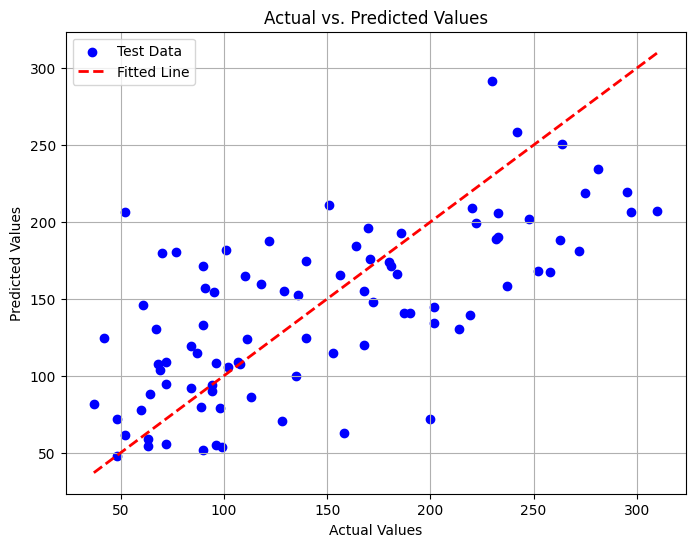

In [27]:
# Split the data into train/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (assuming Linear Regression)
model = LinearRegression()
model.fit(X_train_val, y_train_val)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Fitted Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
***Brief:*** In order to predict the course of diabetes based on patient features, we investigated a number of machine learning models in this investigation, such as k-Nearest Neighbors Regression, Decision Tree Regression, and Linear Regression. We evaluated the performance of the models using cross-validation, and the top model was determined by looking at R-Squared scores.

Cross-validation was used to assess the models, and the results showed that the ***Linear Regression model*** performed the best, having the greatest R-Squared score.

***Limitations:*** The assumption of linearity between the featuress and the target variable is one notable limitation. Certain featuress may have non-linear relationships with diabetes progression that the linear model may not be able to adequately reflect.

***In Conclusion*** Despite its limitations, the Linear Regression model serves as a valuable tool for initial predictions and understanding the general trends in diabetes progression.